In [1]:
import pandas as pd
import numpy as np
import umap
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

In [2]:
ds, ds_info = tfds.load('omniglot', split=['train[:80%]','test'],with_info=True, as_supervised = False)
ds_info

tfds.core.DatasetInfo(
    name='omniglot',
    full_name='omniglot/3.0.0',
    description="""
    Omniglot data set for one-shot learning. This dataset contains 1623 different
    handwritten characters from 50 different alphabets.
    """,
    homepage='https://github.com/brendenlake/omniglot/',
    data_path='/Users/brendanwallace-nash/tensorflow_datasets/omniglot/3.0.0',
    download_size=17.95 MiB,
    dataset_size=12.29 MiB,
    features=FeaturesDict({
        'alphabet': ClassLabel(shape=(), dtype=tf.int64, num_classes=50),
        'alphabet_char_id': tf.int64,
        'image': Image(shape=(105, 105, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=1623),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'small1': <SplitInfo num_examples=2720, num_shards=1>,
        'small2': <SplitInfo num_examples=3120, num_shards=1>,
        'test': <SplitInfo num_examples=13180, num_shards=1>,
        'tra

In [3]:
train = tfds.as_dataframe(ds[0])
test = tfds.as_dataframe(ds[1])

In [4]:
arrayAlph = train["alphabet"].to_list()

In [5]:
uniqueAlph = list(set(arrayAlph))

In [6]:
arrayImage = train["image"].to_list()

In [7]:
y_test = test["alphabet"].to_list()

In [8]:
x_test = test["image"].to_list()

In [9]:
x_test = np.array(x_test)

In [10]:
classes = []

for i in uniqueAlph:
    classes.append(i)

In [11]:
arrayImage = np.array(arrayImage)

In [12]:
label = []
tripletLitst = []
imageL1 = arrayImage
alphL1 = arrayAlph
imageL2 = arrayImage.copy()
alphL2 = arrayAlph.copy()
imageL3 = arrayImage.copy()
alphL3 = arrayAlph.copy()

shuffleList1 = list(zip(imageL2, alphL2))
random.shuffle(shuffleList1)
imageL2, alphL2 = zip(*shuffleList1)

shuffleList2 = list(zip(imageL3, alphL3))
random.shuffle(shuffleList2)
imageL3, alphL3 = zip(*shuffleList2)


for i in range(len(imageL1)):
    a = []
    p = []
    if alphL1[i] == alphL2[i]:
        a.append(imageL1[i])
        p.append(imageL2[i])
        for x in range(len(imageL1)):
            n = []
            if alphL1[i] != alphL3[x]:
                n.append(imageL3[x])
                label.append(0)
                tripletLitst.append([a, p, n])
               

In [13]:
testlabel = []
testList = []
imageL1 = arrayImage
alphL1 = arrayAlph
imageL2 = arrayImage.copy()
alphL2 = arrayAlph.copy()
imageL3 = arrayImage.copy()
alphL3 = arrayAlph.copy()

shuffleList1 = list(zip(imageL2, alphL2))
random.shuffle(shuffleList1)
imageL2, alphL2 = zip(*shuffleList1)

shuffleList2 = list(zip(imageL3, alphL3))
random.shuffle(shuffleList2)
imageL3, alphL3 = zip(*shuffleList2)


for i in range(len(imageL1)):
    a = []
    p = []
    if alphL1[i] == alphL2[i]:
        a.append(imageL1[i])
        p.append(imageL2[i])
        for x in range(len(imageL1)):
            n = []
            if alphL1[i] != alphL3[x]:
                n.append(imageL3[x])
                testlabel.append(0)
                testList.append([a, p, n])
                
            elif alphL1[i] == alphL3[x]:
                n.append(imageL3[x])
                testlabel.append(1)
                testList.append([a, p, n])
               
                
                
        


In [14]:
valuesTest, countsTest = np.unique(testlabel, return_counts=True)

In [15]:
tripletLitst = tripletLitst[:10000]
label = label[:10000]
lenX = round(len(tripletLitst)*0.20)
lenY = round(len(label)*0.20)
X_train = tripletLitst[lenX:]
X_test = tripletLitst[lenX:]
y_train = tripletLitst[:lenX]
y_test = tripletLitst[:lenX]
testList = testList[:2000]
testlabel = testlabel[:2000]



In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
X_train = X_train.reshape(len(X_train), 3, 105, 105, 3)

In [18]:
y_train = y_train.reshape(len(y_train), 3, 105, 105, 3)

In [19]:
arrayAlph = np.array(arrayAlph)

In [20]:
testList = np.array(testList)

In [21]:
y_test = y_test[:10000]

In [22]:
arrayImage = np.array(arrayImage)

In [23]:
x_test = x_test[:10000]

In [24]:
def triplet_loss(y_true, y_pred):
    anchor_out = y_pred[:, 0:100]
    positive_out = y_pred[:, 100:200]
    negative_out = y_pred[:, 200:300]
    
    pos_dist = K.sum(K.abs(anchor_out - positive_out), axis=1)
    neg_dist = K.sum(K.abs(anchor_out - negative_out), axis=1)
    
    probs = K.softmax([pos_dist, neg_dist], axis=0)
    
    return K.mean(K.abs(probs[0]) + K.abs(1.0 - probs[1]))
    

In [25]:
tripletLitst = np.array(tripletLitst)

In [26]:
tripletLitst = tripletLitst.reshape(len(tripletLitst), 3, 105, 105, 3)

In [27]:
testList = testList.reshape(len(testList), 3, 105, 105, 3)

In [28]:
x_test = np.array(x_test)

In [29]:
y_test = np.array(y_test)

In [ ]:
x_test

In [30]:
label = np.array(label)

In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [32]:
input_layer = Input((105, 105, 3))
x = Conv2D(32, 3, activation='relu')(input_layer)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPool2D(2)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(2)(x)
x = Conv2D(128, 3, activation='relu')(x)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
model = Model(input_layer, x)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 105, 105, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 103, 103, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 101, 101, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0     

In [33]:
triplet_model_a = Input((105, 105, 3))
triplet_model_p = Input((105, 105, 3))
triplet_model_n = Input((105, 105, 3))
triplet_model_out = Concatenate()([model(triplet_model_a), model(triplet_model_p), model(triplet_model_n)])
triplet_model = Model([triplet_model_a, triplet_model_p, triplet_model_n], triplet_model_out)
triplet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 105, 105, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 105, 105, 3) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 105, 105, 3) 0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 100)          5784324     input_2[0][0]                    
                                                                 input_3[0][0]              

In [34]:
triplet_model.compile(loss=triplet_loss, optimizer='adam')

In [35]:
history = triplet_model.fit([X_train[:,0],
                   X_train[:,1], X_train[:,2]], 
                  X_test[:], validation_data=([y_train[:,0],
                   y_train[:,1], y_train[:,2]], 
                  y_test[:]), batch_size = 192, epochs=40, callbacks=[callback])





Epoch 1/40
42/42 [==============================] - 64s 2s/step - loss: 0.8414 - val_loss: 0.1330
Epoch 2/40
42/42 [==============================] - 63s 2s/step - loss: 0.0945 - val_loss: 0.0420
Epoch 3/40
42/42 [==============================] - 72s 2s/step - loss: 0.1033 - val_loss: 0.2470
Epoch 4/40
42/42 [==============================] - 67s 2s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 5/40
42/42 [==============================] - 67s 2s/step - loss: 0.0060 - val_loss: 0.0060
Epoch 6/40
42/42 [==============================] - 65s 2s/step - loss: 0.0060 - val_loss: 0.0060
Epoch 7/40
42/42 [==============================] - 63s 2s/step - loss: 0.0060 - val_loss: 0.0060
Epoch 8/40
42/42 [==============================] - 63s 1s/step - loss: 0.0060 - val_loss: 0.0060


In [36]:
tripletLitst[0].shape

(3, 105, 105, 3)

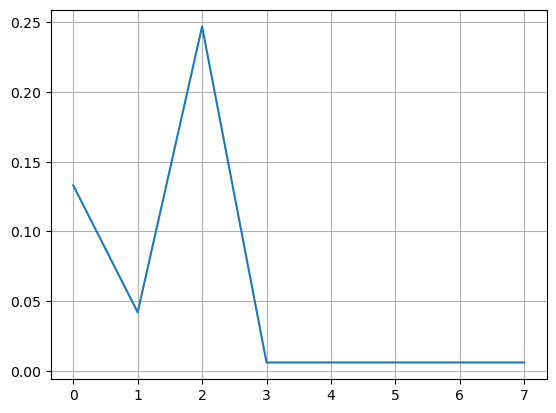

In [37]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.grid(True)
plt.show()

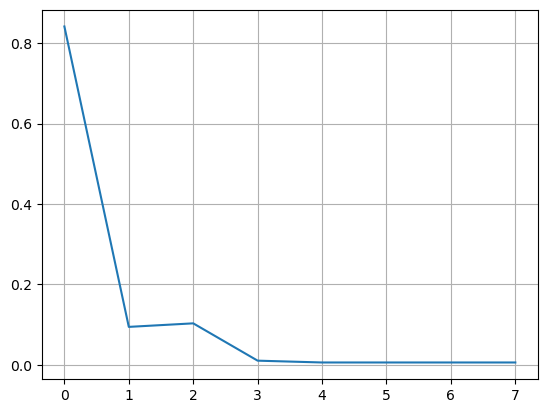

In [38]:
plt.plot(history.history['loss'], label='Loss')
plt.grid(True)
plt.show()

In [39]:
def triplet_acc(imageTrips):
    result = []
    predictionP = triplet_model.layers[3].predict(imageTrips[:,1])
    predictionN = triplet_model.layers[3].predict(imageTrips[:,2])
    
    for i in range(len(imageTrips)):
        posDist = sum(predictionP[i])
        negDist = sum(predictionN[i])
        if posDist > negDist:
            result.append(0)
        if posDist < negDist:
            result.append(1)
    return result

In [40]:
results = triplet_acc(tripletLitst)

In [41]:
resultsTest = triplet_acc(testList)

In [42]:
mixX = np.concatenate((testList[:1000], tripletLitst[:1000]))

In [43]:
mixY = np.concatenate((testlabel[:1000], label[:1000]))

In [44]:
resultsMix = triplet_acc(mixX)

In [45]:
def get_acc(predY, trueY):
    count = 0
    for i in range(len(predY)):
        if predY[i] == trueY[i]:
            count = count+1
        else:
            pass
    accuracy = (count/len(predY))*100
    return accuracy 
            

In [46]:
train_prediction_acc = get_acc(results, label)

In [47]:
print("Accuracy for triplet loss CNN on training data is {}%".format(train_prediction_acc))

Accuracy for triplet loss CNN on training data is 98.49%


In [48]:
test_prediction_acc = get_acc(resultsTest, testlabel)

In [49]:
print("Accuracy for triplet loss CNN on test data is {}%".format(test_prediction_acc))

Accuracy for triplet loss CNN on test data is 91.7%


In [50]:
mix_prediction_acc = get_acc(resultsMix, mixY)

In [51]:
print("Accuracy for triplet loss CNN on mixed data of trainig and test data is {}%".format(mix_prediction_acc))

Accuracy for triplet loss CNN on mixed data of trainig and test data is 95.0%
